In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = True
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "easy",
                      "num_tasks" : 10,
                      "train_percentage" : 0.8,
                      "num_val_benchmarks" : 5,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "Naive baseline",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 5,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 6)}
                #"ewc_lambda" : (200,1000)}
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)

# Parameters specific to the visualization
visualization_settings = {"savefig" : True,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True,
                          "visualize_violin" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation

In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list, model = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-10 15:07:05,029] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


100%|██████████| 4/4 [00:26<00:00,  6.53s/it]
[I 2024-07-10 15:07:32,792] Trial 0 finished with value: 95.95956989247314 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 95.95956989247314.
100%|██████████| 6/6 [00:38<00:00,  6.40s/it]
[I 2024-07-10 15:08:12,732] Trial 1 finished with value: 96.23731182795699 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 96.23731182795699.
100%|██████████| 5/5 [00:33<00:00,  6.72s/it]
[I 2024-07-10 15:08:47,951] Trial 2 finished with value: 96.24591397849461 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 2 with value: 96.24591397849461.
100%|██████████| 3/3 [00:19<00:00,  6.46s/it]
[I 2024-07-10 15:09:08,833] Trial 3 finished with value: 95.50569892473119 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 2 with value: 96.24591397849461.
100%|██████████| 4/4 [00:26<00:00,  6.53s/it]
[I 2024-07-10 15:09:36,554]

Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 5/5 [00:32<00:00,  6.42s/it]
[I 2024-07-10 15:10:21,652] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 4/4 [00:26<00:00,  6.65s/it]
[I 2024-07-10 15:10:51,473] Trial 0 finished with value: 96.54881720430106 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 96.54881720430106.
100%|██████████| 6/6 [00:37<00:00,  6.25s/it]
[I 2024-07-10 15:11:32,018] Trial 1 finished with value: 96.70440860215054 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 96.70440860215054.
100%|██████████| 5/5 [00:33<00:00,  6.63s/it]
[I 2024-07-10 15:12:08,330] Trial 2 finished with value: 96.7041397849462 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 96.70440860215054.
100%|██████████| 3/3 [00:19<00:00,  6.34s/it]
[I 2024-07-10 15:12:30,313] Trial 3 finished with value: 96.54424731182795 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 1 with value: 96.70440860215054.
100%|██████████| 4/4 [00:26<00:00,  6.61s/it]
[I 2024-07-10 15:13:00,079] 

Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 6/6 [00:39<00:00,  6.59s/it]
[I 2024-07-10 15:13:51,899] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 4/4 [00:26<00:00,  6.51s/it]
[I 2024-07-10 15:14:22,643] Trial 0 finished with value: 96.39415770609317 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 96.39415770609317.
100%|██████████| 6/6 [00:39<00:00,  6.60s/it]
[I 2024-07-10 15:15:06,881] Trial 1 finished with value: 96.51491039426521 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 96.51491039426521.
100%|██████████| 5/5 [00:31<00:00,  6.34s/it]
[I 2024-07-10 15:15:43,038] Trial 2 finished with value: 96.4248028673835 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 96.51491039426521.
100%|██████████| 3/3 [00:18<00:00,  6.21s/it]
[I 2024-07-10 15:16:06,138] Trial 3 finished with value: 96.38587813620074 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 1 with value: 96.51491039426521.
100%|██████████| 4/4 [00:24<00:00,  6.22s/it]
[I 2024-07-10 15:16:35,441] 

Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:24<00:00,  6.22s/it]
[I 2024-07-10 15:17:12,654] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4


100%|██████████| 4/4 [00:25<00:00,  6.26s/it]
[I 2024-07-10 15:17:43,653] Trial 0 finished with value: 96.28782258064517 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 96.28782258064517.
100%|██████████| 6/6 [00:37<00:00,  6.27s/it]
[I 2024-07-10 15:18:27,249] Trial 1 finished with value: 96.28983870967743 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 96.28983870967743.
100%|██████████| 5/5 [00:32<00:00,  6.56s/it]
[I 2024-07-10 15:19:06,313] Trial 2 finished with value: 96.25215053763442 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 96.28983870967743.
100%|██████████| 3/3 [00:19<00:00,  6.55s/it]
[I 2024-07-10 15:19:32,243] Trial 3 finished with value: 96.28986559139787 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 3 with value: 96.28986559139787.
100%|██████████| 4/4 [00:25<00:00,  6.45s/it]
[I 2024-07-10 15:20:04,292]

Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:26<00:00,  6.58s/it]
[I 2024-07-10 15:20:43,604] A new study created in memory with name: Search number 5



--------------------------------------------------
LEARNING TASK 5


100%|██████████| 4/4 [00:26<00:00,  6.57s/it]
[I 2024-07-10 15:21:17,300] Trial 0 finished with value: 95.91427956989246 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 95.91427956989246.
100%|██████████| 6/6 [00:37<00:00,  6.27s/it]
[I 2024-07-10 15:22:02,351] Trial 1 finished with value: 95.89587096774196 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 95.91427956989246.
100%|██████████| 5/5 [00:32<00:00,  6.45s/it]
[I 2024-07-10 15:22:42,482] Trial 2 finished with value: 95.78348387096779 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 95.91427956989246.
100%|██████████| 3/3 [00:19<00:00,  6.62s/it]
[I 2024-07-10 15:23:10,230] Trial 3 finished with value: 95.80546236559141 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 0 with value: 95.91427956989246.
100%|██████████| 4/4 [00:26<00:00,  6.70s/it]
[I 2024-07-10 15:23:45,230]

Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:26<00:00,  6.51s/it]
[I 2024-07-10 15:24:24,222] A new study created in memory with name: Search number 6



--------------------------------------------------
LEARNING TASK 6


100%|██████████| 4/4 [00:26<00:00,  6.62s/it]
[I 2024-07-10 15:25:00,113] Trial 0 finished with value: 95.74982078853047 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 95.74982078853047.
100%|██████████| 6/6 [00:39<00:00,  6.51s/it]
[I 2024-07-10 15:25:48,662] Trial 1 finished with value: 95.86338709677422 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 95.86338709677422.
100%|██████████| 5/5 [00:34<00:00,  6.80s/it]
[I 2024-07-10 15:26:32,293] Trial 2 finished with value: 95.68136200716846 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 95.86338709677422.
100%|██████████| 3/3 [00:19<00:00,  6.38s/it]
[I 2024-07-10 15:27:00,400] Trial 3 finished with value: 95.56189964157709 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 1 with value: 95.86338709677422.
100%|██████████| 4/4 [00:25<00:00,  6.29s/it]
[I 2024-07-10 15:27:34,488]

Number of frozen neurons : 500
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.31s/it]
[I 2024-07-10 15:28:12,194] A new study created in memory with name: Search number 7



--------------------------------------------------
LEARNING TASK 7


100%|██████████| 4/4 [00:25<00:00,  6.34s/it]
[I 2024-07-10 15:28:48,069] Trial 0 finished with value: 95.37511520737328 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 95.37511520737328.
100%|██████████| 6/6 [00:38<00:00,  6.42s/it]
[I 2024-07-10 15:29:37,191] Trial 1 finished with value: 95.2862365591398 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 95.37511520737328.
100%|██████████| 5/5 [00:32<00:00,  6.45s/it]
[I 2024-07-10 15:30:20,151] Trial 2 finished with value: 95.31883256528417 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 95.37511520737328.
100%|██████████| 3/3 [00:19<00:00,  6.38s/it]
[I 2024-07-10 15:30:50,155] Trial 3 finished with value: 95.14460829493089 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 0 with value: 95.37511520737328.
100%|██████████| 4/4 [00:26<00:00,  6.60s/it]
[I 2024-07-10 15:31:27,979] 

Number of frozen neurons : 600
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.79s/it]
[I 2024-07-10 15:32:07,873] A new study created in memory with name: Search number 8



--------------------------------------------------
LEARNING TASK 8


100%|██████████| 4/4 [00:25<00:00,  6.39s/it]
[I 2024-07-10 15:32:45,523] Trial 0 finished with value: 94.96388440860215 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 94.96388440860215.
100%|██████████| 6/6 [00:40<00:00,  6.75s/it]
[I 2024-07-10 15:33:39,009] Trial 1 finished with value: 95.19805107526884 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 95.19805107526884.
100%|██████████| 5/5 [00:32<00:00,  6.56s/it]
[I 2024-07-10 15:34:24,243] Trial 2 finished with value: 94.62252688172045 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 95.19805107526884.
100%|██████████| 3/3 [00:20<00:00,  6.88s/it]
[I 2024-07-10 15:34:58,620] Trial 3 finished with value: 94.77701612903229 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 1 with value: 95.19805107526884.
100%|██████████| 4/4 [00:29<00:00,  7.26s/it]
[I 2024-07-10 15:35:40,596]

Number of frozen neurons : 700
Number of trainable neurons : 100


100%|██████████| 4/4 [00:28<00:00,  7.14s/it]
[I 2024-07-10 15:36:22,681] A new study created in memory with name: Search number 9



--------------------------------------------------
LEARNING TASK 9


100%|██████████| 4/4 [00:28<00:00,  7.07s/it]
[I 2024-07-10 15:37:05,604] Trial 0 finished with value: 94.96418160095581 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 94.96418160095581.
100%|██████████| 6/6 [00:41<00:00,  6.94s/it]
[I 2024-07-10 15:38:01,743] Trial 1 finished with value: 95.16511350059739 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 95.16511350059739.
100%|██████████| 5/5 [00:32<00:00,  6.55s/it]
[I 2024-07-10 15:38:48,028] Trial 2 finished with value: 94.9045400238949 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 95.16511350059739.
100%|██████████| 3/3 [00:19<00:00,  6.40s/it]
[I 2024-07-10 15:39:20,797] Trial 3 finished with value: 94.73388291517325 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 1 with value: 95.16511350059739.
100%|██████████| 4/4 [00:25<00:00,  6.41s/it]
[I 2024-07-10 15:39:59,990] 

Number of frozen neurons : 800
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.42s/it]
[I 2024-07-10 15:40:38,532] A new study created in memory with name: Search number 10



--------------------------------------------------
LEARNING TASK 10


100%|██████████| 4/4 [00:25<00:00,  6.41s/it]
[I 2024-07-10 15:41:19,312] Trial 0 finished with value: 94.7135053763441 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 94.7135053763441.
100%|██████████| 6/6 [00:38<00:00,  6.45s/it]
[I 2024-07-10 15:42:13,172] Trial 1 finished with value: 94.78307526881721 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 94.78307526881721.
100%|██████████| 5/5 [00:32<00:00,  6.46s/it]
[I 2024-07-10 15:43:00,580] Trial 2 finished with value: 94.8219677419355 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 2 with value: 94.8219677419355.
100%|██████████| 3/3 [00:19<00:00,  6.44s/it]
[I 2024-07-10 15:43:35,040] Trial 3 finished with value: 94.49768817204301 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 2 with value: 94.8219677419355.
100%|██████████| 4/4 [00:26<00:00,  6.66s/it]
[I 2024-07-10 15:44:16,889] Tria

Number of frozen neurons : 900
Number of trainable neurons : 100


100%|██████████| 4/4 [00:26<00:00,  6.72s/it]


## Visualize results

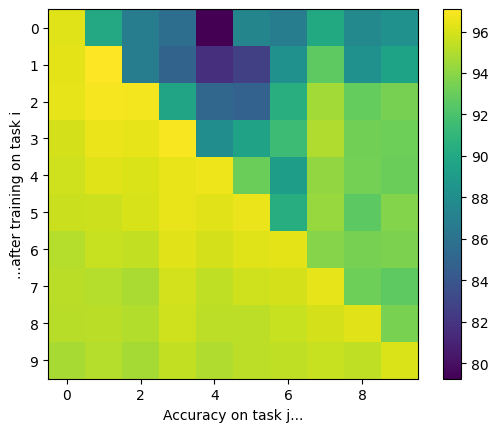

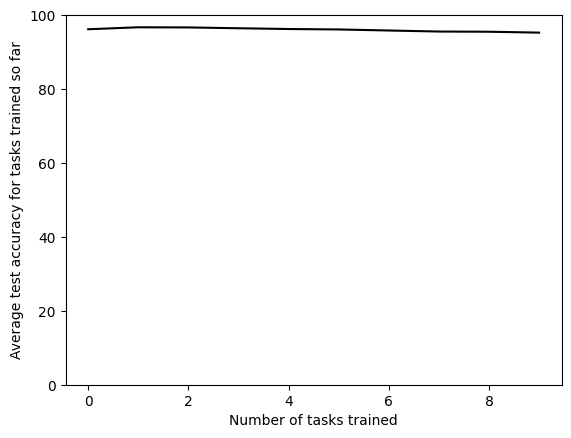

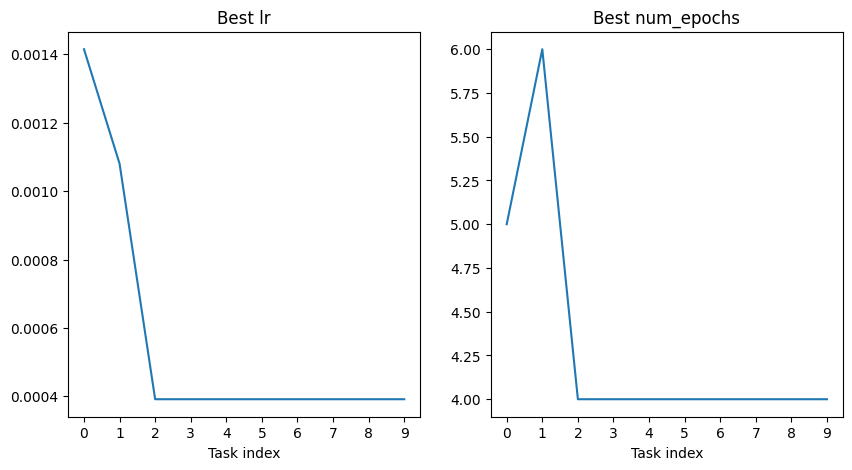

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 5/5 [00:32<00:00,  6.60s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 6/6 [00:39<00:00,  6.66s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:26<00:00,  6.70s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.76s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.79s/it]



--------------------------------------------------
LEARNING TASK 6
Number of frozen neurons : 500
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.88s/it]



--------------------------------------------------
LEARNING TASK 7
Number of frozen neurons : 600
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.84s/it]



--------------------------------------------------
LEARNING TASK 8
Number of frozen neurons : 700
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.89s/it]



--------------------------------------------------
LEARNING TASK 9
Number of frozen neurons : 800
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.95s/it]



--------------------------------------------------
LEARNING TASK 10
Number of frozen neurons : 900
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.96s/it]



BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 5/5 [00:32<00:00,  6.59s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 6/6 [00:40<00:00,  6.67s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:26<00:00,  6.58s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:24<00:00,  6.22s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.27s/it]



--------------------------------------------------
LEARNING TASK 6
Number of frozen neurons : 500
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.32s/it]



--------------------------------------------------
LEARNING TASK 7
Number of frozen neurons : 600
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.33s/it]



--------------------------------------------------
LEARNING TASK 8
Number of frozen neurons : 700
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.37s/it]



--------------------------------------------------
LEARNING TASK 9
Number of frozen neurons : 800
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.41s/it]



--------------------------------------------------
LEARNING TASK 10
Number of frozen neurons : 900
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.44s/it]



BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 5/5 [00:30<00:00,  6.12s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 6/6 [00:36<00:00,  6.15s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:24<00:00,  6.21s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.25s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.31s/it]



--------------------------------------------------
LEARNING TASK 6
Number of frozen neurons : 500
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.33s/it]



--------------------------------------------------
LEARNING TASK 7
Number of frozen neurons : 600
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.35s/it]



--------------------------------------------------
LEARNING TASK 8
Number of frozen neurons : 700
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.39s/it]



--------------------------------------------------
LEARNING TASK 9
Number of frozen neurons : 800
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.43s/it]



--------------------------------------------------
LEARNING TASK 10
Number of frozen neurons : 900
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.47s/it]



BENCHMARK 3

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 5/5 [00:30<00:00,  6.14s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 6/6 [00:37<00:00,  6.18s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:24<00:00,  6.22s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.27s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.30s/it]



--------------------------------------------------
LEARNING TASK 6
Number of frozen neurons : 500
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.33s/it]



--------------------------------------------------
LEARNING TASK 7
Number of frozen neurons : 600
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.37s/it]



--------------------------------------------------
LEARNING TASK 8
Number of frozen neurons : 700
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.41s/it]



--------------------------------------------------
LEARNING TASK 9
Number of frozen neurons : 800
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.45s/it]



--------------------------------------------------
LEARNING TASK 10
Number of frozen neurons : 900
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.47s/it]



BENCHMARK 4

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 5/5 [00:30<00:00,  6.15s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 6/6 [00:37<00:00,  6.21s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:24<00:00,  6.24s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:26<00:00,  6.70s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.86s/it]



--------------------------------------------------
LEARNING TASK 6
Number of frozen neurons : 500
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.98s/it]



--------------------------------------------------
LEARNING TASK 7
Number of frozen neurons : 600
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.98s/it]



--------------------------------------------------
LEARNING TASK 8
Number of frozen neurons : 700
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.91s/it]



--------------------------------------------------
LEARNING TASK 9
Number of frozen neurons : 800
Number of trainable neurons : 100


100%|██████████| 4/4 [00:28<00:00,  7.07s/it]



--------------------------------------------------
LEARNING TASK 10
Number of frozen neurons : 900
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.99s/it]



BENCHMARK 5

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 5/5 [00:33<00:00,  6.63s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 6/6 [00:39<00:00,  6.63s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:26<00:00,  6.63s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:26<00:00,  6.72s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.79s/it]



--------------------------------------------------
LEARNING TASK 6
Number of frozen neurons : 500
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.76s/it]



--------------------------------------------------
LEARNING TASK 7
Number of frozen neurons : 600
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.78s/it]



--------------------------------------------------
LEARNING TASK 8
Number of frozen neurons : 700
Number of trainable neurons : 100


100%|██████████| 4/4 [00:27<00:00,  6.82s/it]



--------------------------------------------------
LEARNING TASK 9
Number of frozen neurons : 800
Number of trainable neurons : 100


100%|██████████| 4/4 [00:26<00:00,  6.70s/it]



--------------------------------------------------
LEARNING TASK 10
Number of frozen neurons : 900
Number of trainable neurons : 100


100%|██████████| 4/4 [00:25<00:00,  6.49s/it]


## Visualize validation

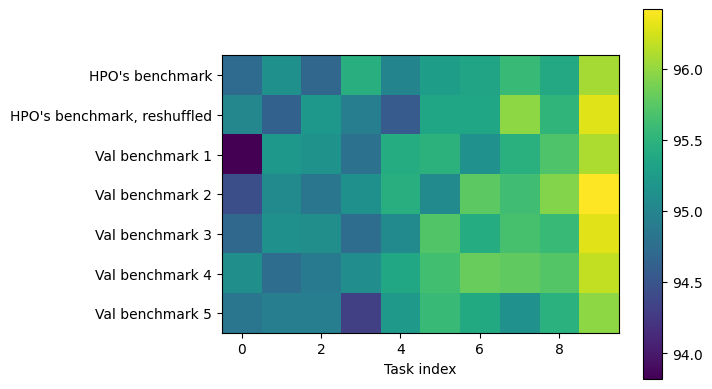

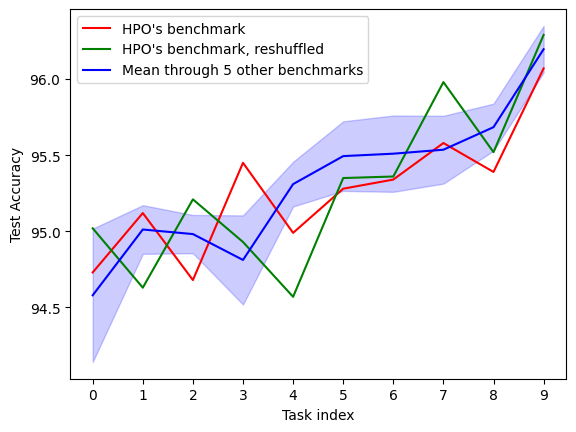

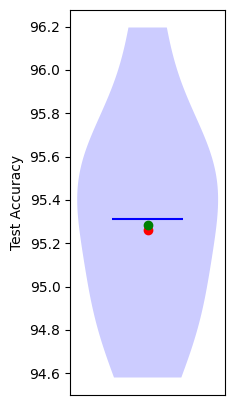

In [10]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [11]:
if save_results :
    np.savetxt('Results/test_accs_matrix.csv', test_accs_matrix)
    np.savetxt('Results/val_accs_matrix.csv', val_accs_matrix)